<a href="https://colab.research.google.com/github/1rd0/cv/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_1_sklearn_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-ближайщих соседей

## Лабораторная работа №1


---

**Впишите в эту ячейку ваши ФИО, группу и вариант**.

ФИО:
Рабдел Дмитрий Александрович
Группа:

Вариант:3
---

Далее по ходу ноутбука вам встрется ячейки с кодом, в которых будут комментарии с заданиями, и текстовые ячейки с вопросами, на которые вам необходимо письменно в ноутбуке ответить.

Все ячейки необходимо запускать.

Данные для вариантов лежат по ссылкам:

1. http://labcolor.space/knn-1.csv
1. http://labcolor.space/knn-2.csv
1. http://labcolor.space/knn-3.csv

Скопируйте ссылку для своего варианта.

### Импортирование модулей для выполнения работы

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #для визуализации данных.
import seaborn as sns
from sklearn.model_selection import train_test_split #для разделения данных на тренировочный и тестовый наборы.
from sklearn.preprocessing import StandardScaler #для стандартизации данных.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline
%config InlineBackend.figure_format = 'svg' #Конфигурация формата сохранения изображений в векторном формате SVG.
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 5 #натсройка

Загружаем данные и после выполнения ячейки в выводе должны быть показаны названия столбцов и первые 5 элементов.

In [49]:
df = pd.read_csv("/content/knn-3.csv", dtype={'target':'category'})
df.head()

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,target
0,3.174204,-1.136999,-2.351310,-2.003735,-0.005322,1.800765,-2.546321,-3.900723,0
1,-0.600370,2.314445,3.689726,1.334768,3.690976,-0.601241,0.437281,-2.635723,2
2,0.541306,0.952035,-0.208705,2.236486,3.096002,-1.458024,2.884223,3.029775,1
3,0.713610,-0.373447,-4.350381,1.234337,0.693869,2.245402,-0.460046,-0.593554,1
4,-0.084778,2.485978,0.422907,-2.047483,-1.753940,1.152413,-1.011035,-3.077880,1


В слудующих двух ячейках выведется статистика по вашим данным.

In [50]:
df.describe(include='number')

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.278944,0.298420,0.258537,-0.222609,0.242526,0.510589,-0.229492,-0.060369
std,1.908944,1.925397,2.068448,2.071286,1.802636,1.773920,1.814418,1.967284
min,-6.457514,-5.926529,-6.328785,-6.187366,-6.937898,-5.309478,-5.401892,-6.399801
25%,-1.012364,-1.028279,-1.141475,-1.602696,-0.944128,-0.567953,-1.466721,-1.430912
50%,0.314052,0.341535,0.358314,-0.321795,0.292186,0.602860,-0.356480,-0.106940
75%,1.578690,1.523217,1.662746,1.079925,1.506067,1.705878,0.856737,1.197518
max,7.130152,7.561378,6.773532,6.759298,6.976518,6.623025,6.627630,6.152861


In [34]:
df.shape

(999, 9)

**Сколько объектов есть в вашем наборе данных?**

Ответ:999

**Сколько признаков у ваших объектов?**

Ответ:9

In [51]:
df.describe(include='category')

,target
count,999
unique,4
top,1
freq,250


**Сколько классов в вашем целевом признаке?**

Ответ:4

[link text](https://)Теперь оценим распределение по классам

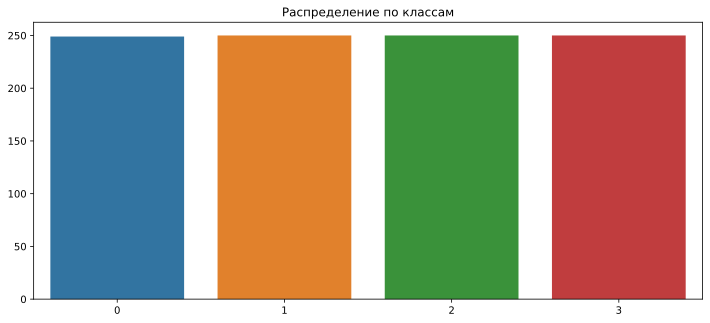

In [52]:
labels, counts = np.unique(df['target'], return_counts=True)
fig, axs = plt.subplots(ncols=1)
sns.barplot(x=[str(label) for label in labels], y=counts, ax=axs).set_title("Распределение по классам")
plt.show()

**Равномерное ли у вас распреденеие по классам?**

Ответ:да

## Подготовка данных для работы с моделью

Разделим наши признаки и метки классов.

In [53]:
y = df.pop('target')
X = df

Далее используя метод `train_test_split()` разделите данные на обучающую и проверочную части. В тестовую часть выделите 15% ваши данных и укажите random_state для воспроизводимости вашего результата.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.85,random_state=43)

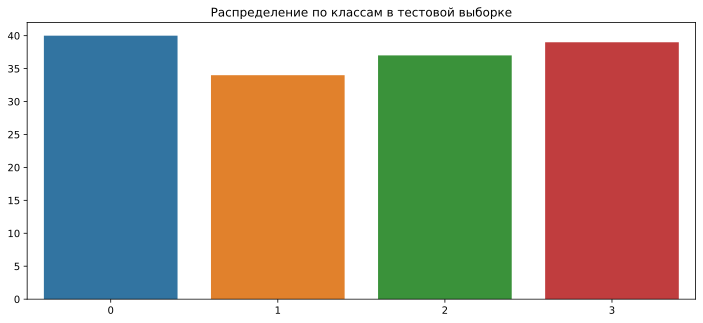

In [57]:
labels, counts = np.unique(y_test, return_counts=True)
fig, axs = plt.subplots(ncols=1)
sns.barplot(x=[str(label) for label in labels], y=counts, ax=axs).set_title("Распределение по классам в тестовой выборке")
plt.show()

**Равномерное ли у вас распреденеие по классам в тестовой выборке и каким оно должно быть в идеальном случае?**

Ответ:  ближе Да,когда каждый класс должен представлять примерно одинаковую долю от общего числа примеров в тестовой выборк




Поскольку алгоритм K-ближайших соседей делает прогнозы относительно точки данных (семпла), используя наиболее близкие к ней наблюдения, существующий масштаб показателей в датасете имеет большое значение.

обычно стандартизируют набор данных, что означает корректировку каждого значения x так, чтобы они находились примерно в одном диапазоне.
Стандартизация признаков путем вычитания среднего значения и масштабирования до единичной дисперсии.


In [58]:
scaler = StandardScaler() #стандартизации данны

Используя объект `scaler` вычислите среднее и стандартное отклонение для последующего масштабирования признаков с помощью метода `fit`.

С помощью метода `transform` преобразуйте ваши данные и сохраните их в новые переменные.

In [59]:
  scaler.fit(X_train,y_train)
  X_train_scaled=scaler.transform(X_train)
  X_test_scaled=scaler.transform(X_test)

**Для чего требуется предобработка данных?**

Ответ:для очистки и структуризации исходных данных от выбросов и пропусков

## Создание и обучение классификатора

Создайте классификатор knn указав аргументы:

*   List item
*   List item


- n_neighbors - количество соседей
- metric - способ засчета расстояний между объектами
- algorithm - оставляйте 'brute'

In [60]:
clf = KNeighborsClassifier(algorithm='brute',n_neighbors=5,metric="l1")

С помощью метода fit для объекта обучите вашу модель, для обучения используйте предобработанные данные.

In [61]:
clf.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='brute', metric='l1')

## Оценка модели

Проверьте результат работы вашей модели используя медот `score` классификатора, передав в него тестовую часть ваших данных.

In [62]:
clf.score(X_test_scaled,y_test) #вычисления оценки (accuracy) на тестовом наборе

0.8266666666666667

**Что значит данное число?**

Ответ: accuracy оценивает производительность модели путем сравнения предсказанных значений с истинными значениями в тестовом наборе и возвращает долю правильных предсказаний.

Для построения матрицы ошибок, замените комментарии на ваши переменные.

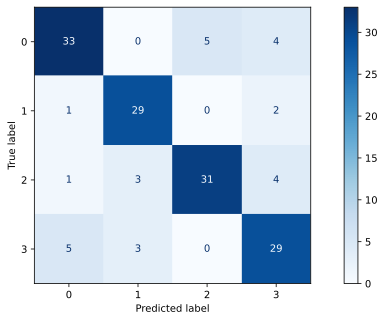

In [45]:
ConfusionMatrixDisplay.from_estimator(
    # Объект вашего классификатора,
    clf,
    # множество тестовых объектов,
                                      X_test_scaled,
    # множество тестовых меток классов,
                                      y_test,
    display_labels=np.unique(y),
    cmap=plt.cm.Blues,
    normalize=None,
)

**Что показывает матрица ошибок?**

Ответ:Она предоставляет обзор того, насколько хорошо классификатор делает прогнозы на основе заданного набора данных.

Вернитесь в раздел "Создание и обучение классификатора" и попробуйте другие варианты параметров для модели k-ближайших соседей (количество соседей и метрик)

**Итоговые результаты**

Максимальная оценка вашей модели (score):0.81

Параметры лучшей модели:

- количество соседей:5
- метрика:l1

## Контрольные вопросы

**Опишите алгоритм работы метода k-ближайших соседей.**

Ответ:
1. Выбираем число k ближайших соседей.
2. Рассчитываем расстояние от нового объекта до всех существующих.
3. Сортируем по возрастанию.
4. Выбираем первые k возрастаний.
5. Среди этих расстояний смотрим, каким классом относятся объекты.
6. Относим объект к классу, который встречается чаще всего.

**Чем отличаются l1 и l2 метрики?**

Ответ:Ответ:
1) l1

1.1 Сумма модулей разности координат

1.2 Устойчива к выбросам

1.3 Обнуляет не нужные признаки и оставляет те, которые имеют отношение к предсказанию

2) l2  
2.1 Квадратный корень из суммы квадратов разностей координат

2.2 Не устойчива к выбросам

2.3 Оставляет все признаки, которые имеют одно отношение к прогнозированию целевого признака